<a href="https://colab.research.google.com/github/JamileSantos/iss_estocastico/blob/master/serie_temp_1248.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving produto-updated.csv to produto-updated.csv


In [0]:
print (uploaded['produto-updated.csv'][:200].decode('utf-8') + '...')

produto_estoque_id,date,mov
1817680,2017-02-08,20520.0
1817680,2017-02-14,20520.0
1817680,2017-04-26,381.9
1817680,2017-06-27,1898.1
1817681,2017-02-08,24840.0
1817681,2017-02-14,24840.0
1817681,2017-...


In [0]:
# importar pacotes e setar configurações de plots
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

# importar o csv para um dataframe
df = pd.read_csv("produto-updated.csv")
 
# ver as 5 primeiras entradas
df.head()

,produto_estoque_id,date,mov
0,1817680,2017-02-08,20520.0
1,1817680,2017-02-14,20520.0
2,1817680,2017-04-26,381.9
3,1817680,2017-06-27,1898.1
4,1817681,2017-02-08,24840.0


In [0]:
display(pd.to_datetime(df.date, format="%Y-%m-%d").head())

0   2017-02-08
1   2017-02-14
2   2017-04-26
3   2017-06-27
4   2017-02-08
Name: date, dtype: datetime64[ns]

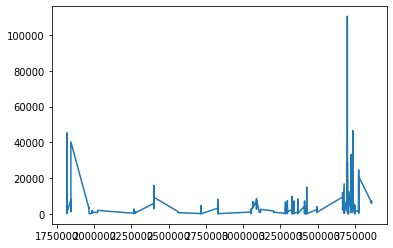

In [0]:
# plotar gráfico de consumo
plt.plot( df.produto_estoque_id, df.mov);

In [0]:
#trace = go.Scatter(x = df['produto_estoque_id'], y = df['mov'],mode = 'markers')
#data = [trace]
#py.iplot(data)

In [0]:
df.date = pd.to_datetime(df.date, format="%Y-%m-%d")

# criar features para cada período
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['day_of_week'] = df.date.dt.dayofweek
df['freq'] = df.date.dt.freq

In [0]:
df.head()

,produto_estoque_id,date,mov,year,month,day,day_of_week,freq
0,1817680,2017-02-08,20520.0,2017,2,8,2,None
1,1817680,2017-02-14,20520.0,2017,2,14,1,None
2,1817680,2017-04-26,381.9,2017,4,26,2,None
3,1817680,2017-06-27,1898.1,2017,6,27,1,None
4,1817681,2017-02-08,24840.0,2017,2,8,2,None


In [0]:
# converter as variáveis em 0 ou 1
df['weekend'] = 0
df.loc[(df.day_of_week == 5) | (df.day_of_week == 6), 'weekend'] = 1

In [0]:
# verificar os valores final de semana x semana
df.weekend.value_counts()

0    2448
1       1
Name: weekend, dtype: int64

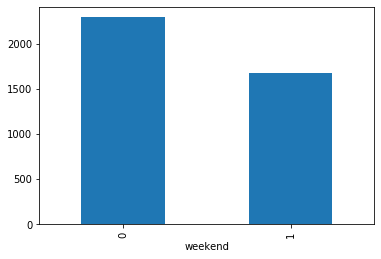

In [0]:
# plotar os valores final de semana x semana
df.groupby('weekend').mov.mean().plot.bar()

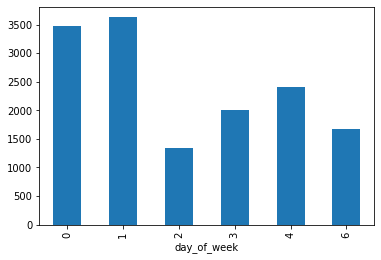

In [0]:
# plotar os valores final de semana x semana
df.groupby('day_of_week').mov.mean().plot.bar()

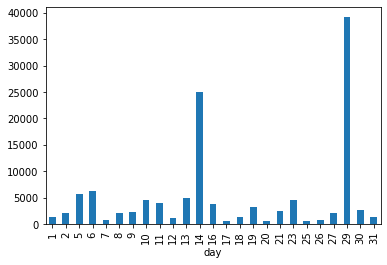

In [0]:
# plotar os valores em função do dia
df.groupby('day').mov.mean().plot.bar();

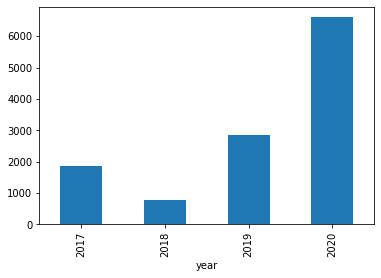

In [0]:
# plotar os valores em função dos meses
df.groupby('year').mov.mean().plot.bar();